In [23]:
import pandas as pd

# Load the dataset
df = pd.read_csv('HR_comma_sep.csv')  # make sure this path is correct

# Check for missing values
missing_values = df.isnull().sum()
missing_values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

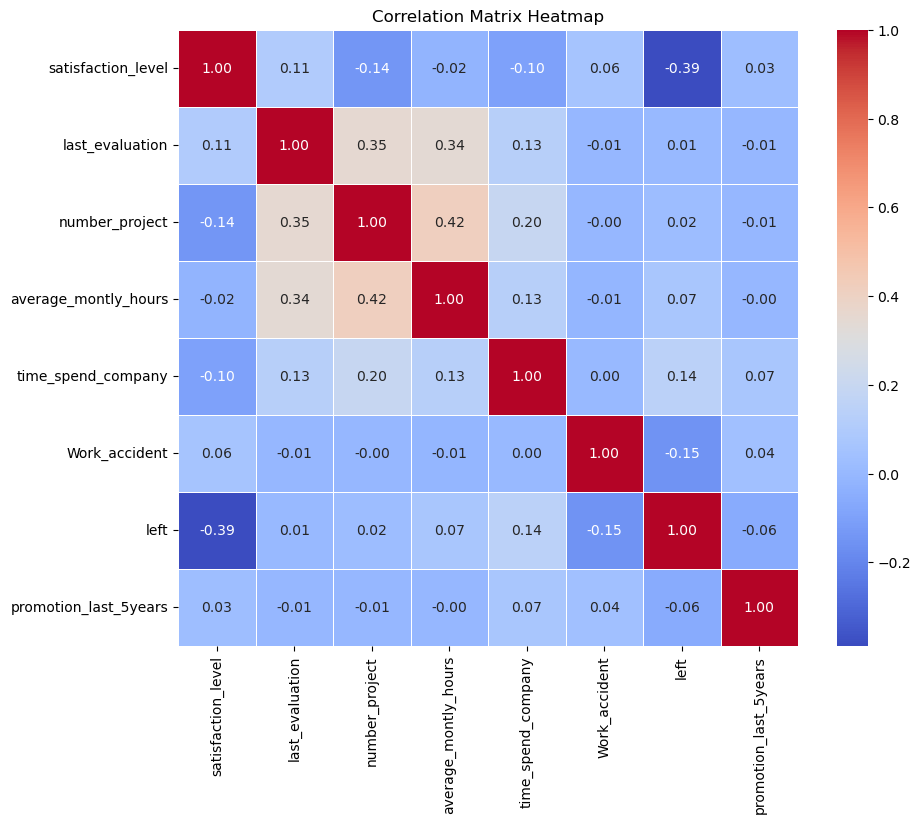

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation matrix
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

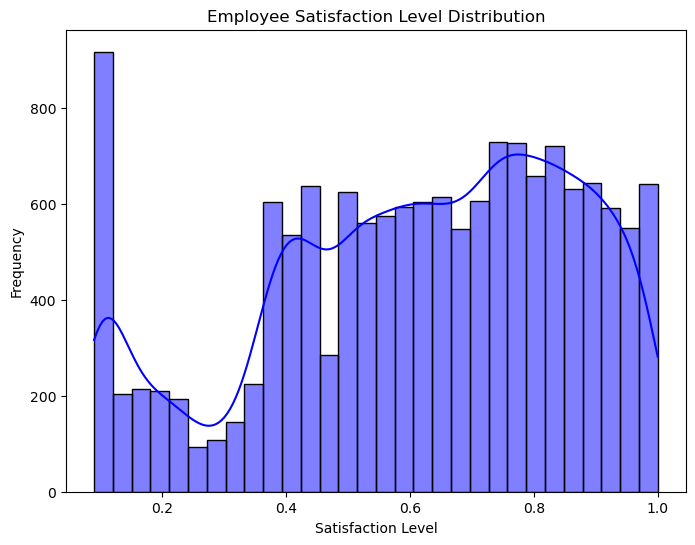

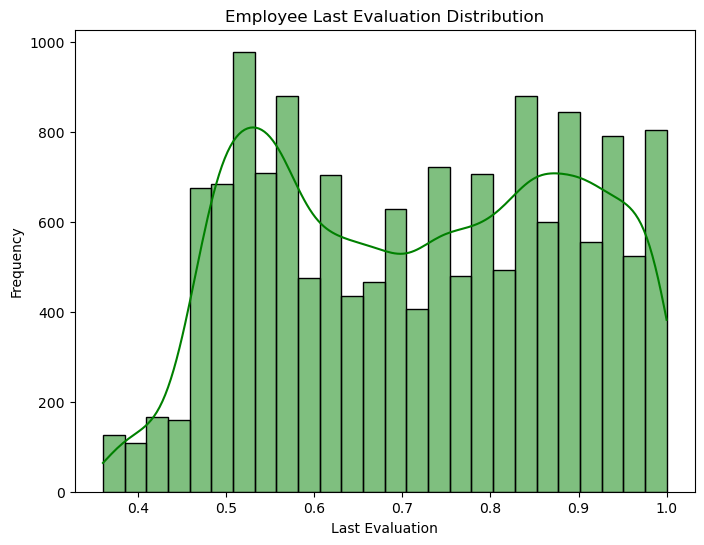

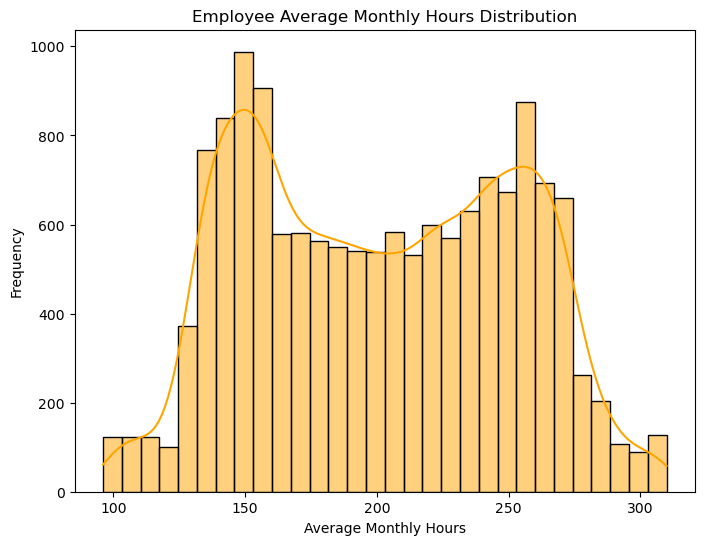

In [31]:
# Plot distribution of satisfaction_level
plt.figure(figsize=(8, 6))
sns.histplot(df['satisfaction_level'], kde=True, color='blue')
plt.title('Employee Satisfaction Level Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of last_evaluation
plt.figure(figsize=(8, 6))
sns.histplot(df['last_evaluation'], kde=True, color='green')
plt.title('Employee Last Evaluation Distribution')
plt.xlabel('Last Evaluation')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of average_monthly_hours
plt.figure(figsize=(8, 6))
sns.histplot(df['average_montly_hours'], kde=True, color='orange')
plt.title('Employee Average Monthly Hours Distribution')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.show()


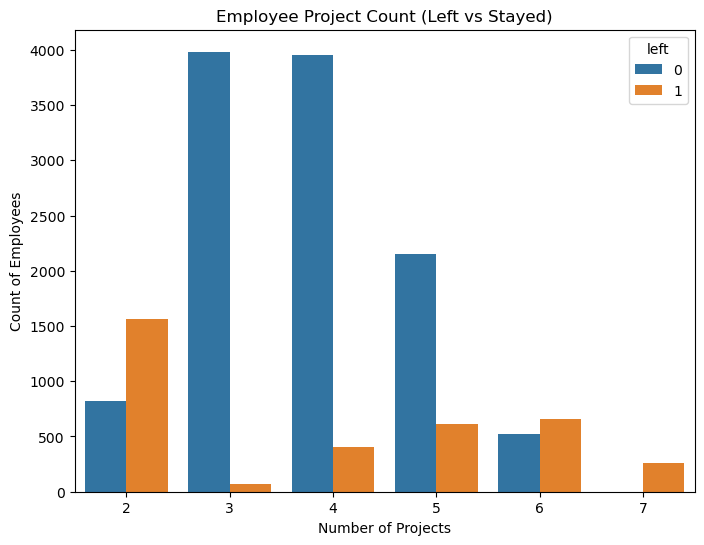

In [33]:
# Bar plot showing number of projects for employees who left and stayed
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='number_project', hue='left')
plt.title('Employee Project Count (Left vs Stayed)')
plt.xlabel('Number of Projects')
plt.ylabel('Count of Employees')
plt.show()


In [35]:
#3
# Select relevant columns for clustering
clustering_data = df[['satisfaction_level', 'last_evaluation', 'left']]
clustering_data.head()


,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1


In [41]:
from sklearn.cluster import KMeans

# Select the employees who left and make a copy to avoid the SettingWithCopyWarning
left_employees = df[df['left'] == 1].copy()

# Fit the KMeans clustering model to the 'satisfaction_level' and 'last_evaluation' columns
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['Cluster'] = kmeans.fit_predict(left_employees[['satisfaction_level', 'last_evaluation']])

# Check the first few rows to verify the new column
left_employees.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Cluster
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


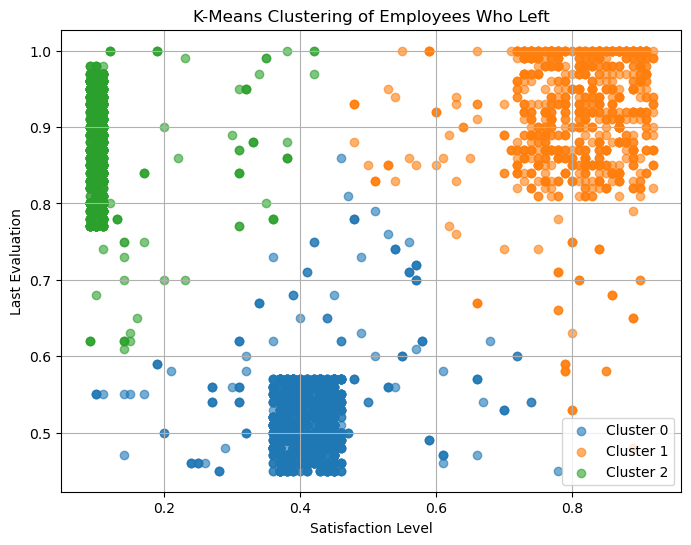

In [71]:
# 3.2 K-Means Clustering for Employees Who Left
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Filter for employees who left
left_employees = df[df['left'] == 1].copy()

# K-Means clustering on satisfaction_level and last_evaluation
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees.loc[:, 'Cluster'] = kmeans.fit_predict(left_employees[['satisfaction_level', 'last_evaluation']])

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = left_employees[left_employees['Cluster'] == cluster]
    plt.scatter(cluster_data['satisfaction_level'], cluster_data['last_evaluation'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('K-Means Clustering of Employees Who Left')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
#4
# Convert categorical variables to numeric using get_dummies
categorical_columns = ['sales', 'salary']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Separate features and target
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']



In [47]:
from sklearn.model_selection import train_test_split

# Split data into train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)


In [49]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=123)

# Upsample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [55]:
#5
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Separate the features and the target variable
X = df.drop(columns=['left'])  # Features
y = df['left']  # Target

# Select only numeric columns for scaling
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=500, random_state=42)

# 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X_scaled, y, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())


Cross-validation scores: [0.76833333 0.76366667 0.77233333 0.76133333 0.75991997]
Average accuracy: 0.7651173279982216


In [57]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model and perform 5-fold CV
rf_model = RandomForestClassifier(random_state=123)
cv_scores_rf = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

# Display classification report
rf_model.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [59]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model and perform 5-fold CV
gb_model = GradientBoostingClassifier(random_state=123)
cv_scores_gb = cross_val_score(gb_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

# Display classification report
gb_model.fit(X_train_smote, y_train_smote)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.92      0.93      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000



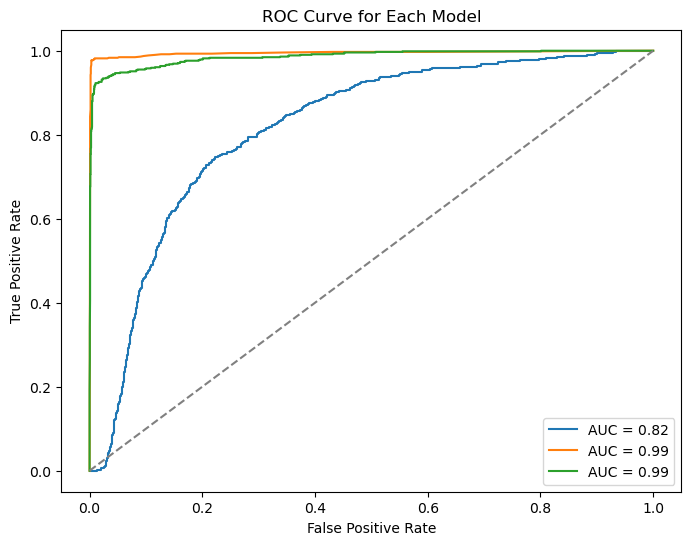

In [61]:
#6
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC/AUC and plot ROC curve for each model
def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")

plt.figure(figsize=(8, 6))
plot_roc_curve(lr_model, X_test, y_test)
plot_roc_curve(rf_model, X_test, y_test)
plot_roc_curve(gb_model, X_test, y_test)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for Each Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


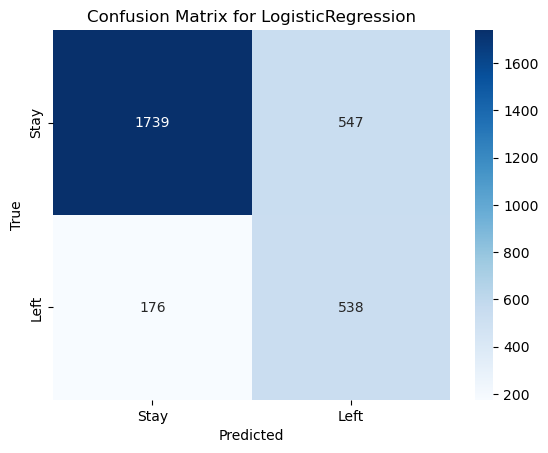

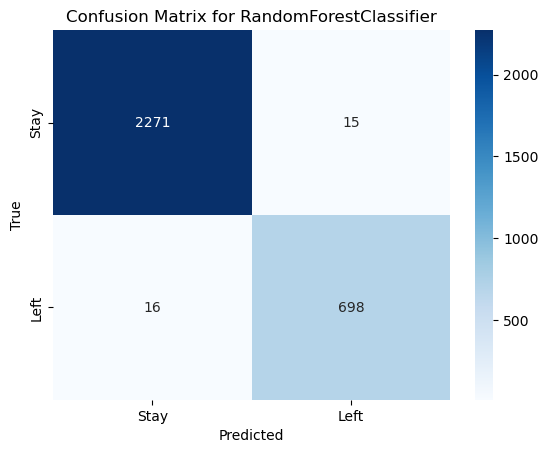

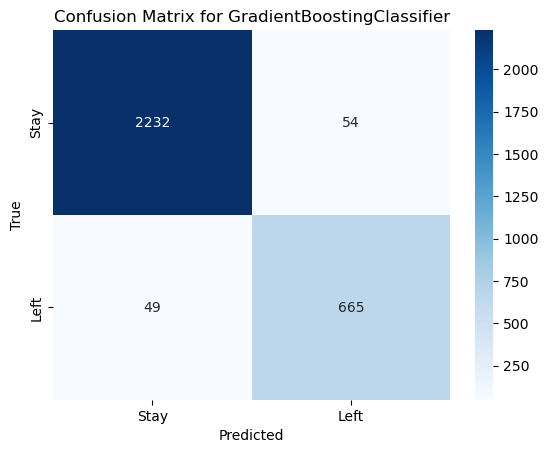

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrix for each model
def plot_confusion_matrix(model, X_test, y_test):
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay', 'Left'], yticklabels=['Stay', 'Left'])
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(lr_model, X_test, y_test)
plot_confusion_matrix(rf_model, X_test, y_test)
plot_confusion_matrix(gb_model, X_test, y_test)


In [65]:
#7
# Predict probabilities of employee turnover for the test data
y_prob_best_model = gb_model.predict_proba(X_test)[:, 1]


In [67]:
# Define the probability score ranges and categorize employees into zones
def categorize_risk(probabilities):
    categories = []
    for prob in probabilities:
        if prob < 0.2:
            categories.append('Safe Zone (Green)')
        elif 0.2 <= prob < 0.6:
            categories.append('Low-Risk Zone (Yellow)')
        elif 0.6 <= prob < 0.9:
            categories.append('Medium-Risk Zone (Orange)')
        else:
            categories.append('High-Risk Zone (Red)')
    return categories

risk_zones = categorize_risk(y_prob_best_model)

# Create a DataFrame to analyze employees in different risk zones
risk_zone_df = pd.DataFrame({
    'Employee_ID': X_test.index,
    'Probability': y_prob_best_model,
    'Risk Zone': risk_zones
})
risk_zone_df.head()


,Employee_ID,Probability,Risk Zone
0,10627,0.006049,Safe Zone (Green)
1,2703,0.953911,High-Risk Zone (Red)
2,6059,0.092437,Safe Zone (Green)
3,3258,0.018467,Safe Zone (Green)
4,4565,0.026336,Safe Zone (Green)


In [69]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(log_reg, X_scaled, y, cv=5)

# Print the individual scores and average
print("Cross-Validation Scores for Each Fold:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Scores for Each Fold: [0.771      0.77266667 0.77866667 0.76566667 0.61987329]
Average Accuracy: 0.7415746582194065
